In [ ]:
import tensorflow as tf
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import seaborn as sns
import cv2

In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Model and extract feature from an intermidiate layer

In [ ]:
import pickle
# load the model from disk
filename = '/content/drive/My Drive/Colab Notebooks/Blstmmodel32.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
import pickle
filename = '/content/drive/My Drive/Colab Notebooks/BX_train_sm.csv'
X_train = pickle.load(open(filename, 'rb'))

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/By_train_sm.csv'
y_train = pickle.load(open(filename, 'rb'))

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/BX_test_sm.csv'
X_test = pickle.load(open(filename, 'rb'))

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/By_test_sm.csv'
y_test = pickle.load(open(filename, 'rb'))

In [ ]:
from tensorflow import keras
layer_name = 'flatten_1'
intermediate_layer_model = keras.Model(inputs=loaded_model.input,
                                 outputs=loaded_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_train)

### Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import time
start = time.time()
ETmodel = ExtraTreesClassifier().fit(intermediate_output, y_train)
end = time.time()
print("It took {} milliseconds to train ET with feature from LSTM intermidiate layer.\n".format(end-start))

It took 576.3876037597656 milliseconds to train ET with feature from LSTM intermidiate layer.



In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
ETpred = ETmodel.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print(classification_report(y_test, ETpred))
print("It took {} milliseconds to test ET with feature from LSTM intermidiate layer.\n".format(end-start))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    293300
           1       0.96      0.99      0.98    122028

    accuracy                           0.99    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.99      0.99      0.99    415328

It took 93.69631099700928 milliseconds to test ET with feature from LSTM intermidiate layer.



In [ ]:
print('accuracy on the train set: ', accuracy_score(ETmodel.predict(intermediate_output), y_train))
print('accuracy on the test set: ', accuracy_score(ETpred, y_test))

accuracy on the train set:  0.999988464555424
accuracy on the test set:  0.9861314431003929


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


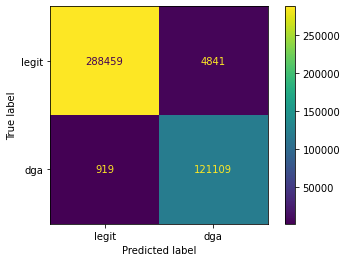

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ETmodel, intermediate_layer_model.predict(X_test), y_test, display_labels=["legit", "dga"])

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

etpprd = ETmodel.predict_proba(intermediate_layer_model.predict(X_test))[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,etpprd)
auc = metrics.roc_auc_score(y_test,etpprd)

In [ ]:
print(auc)

0.9979613099813293


<function matplotlib.pyplot.show>

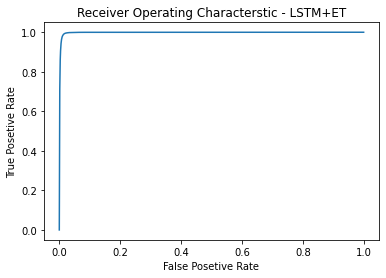

In [ ]:
plt.title('Receiver Operating Characterstic - LSTM+ET')
plt.plot(fpr,tpr,label= "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLSTM+ETmodel.sav'
pickle.dump(ETmodel, open(filename, 'wb'))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
DTmodel = DecisionTreeClassifier().fit(intermediate_output, y_train)
end = time.time()
print("It took {} milliseconds to train DT with feature from LSTM intermidiate layer.\n".format(end-start))

It took 462.0049135684967 milliseconds to train DT with feature from LSTM intermidiate layer.



In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
DTpred = DTmodel.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print(classification_report(y_test, DTpred))
print("It took {} milliseconds to test DT with feature from LSTM intermidiate layer.\n".format(end-start))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    293300
           1       0.95      0.98      0.97    122028

    accuracy                           0.98    415328
   macro avg       0.97      0.98      0.98    415328
weighted avg       0.98      0.98      0.98    415328

It took 82.99525952339172 milliseconds to test DT with feature from LSTM intermidiate layer.



In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
average_precision = precision_score(y_test, DTpred)
recall_score=recall_score(y_test, DTpred)
f1_score = f1_score(y_test, DTpred)
accuracy_score = accuracy_score(y_test,DTpred) 
print(average_precision,recall_score,f1_score,accuracy_score)

0.9539340202891605 0.9786524404235094 0.9661351519711349 0.9798424377841128


In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
DTpred = DTmodel.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print(classification_report(y_test, DTpred))
print("It took {} milliseconds to test DT with feature from LSTM intermidiate layer.\n".format(end-start))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    293300
           1       0.95      0.98      0.97    122028

    accuracy                           0.98    415328
   macro avg       0.97      0.98      0.98    415328
weighted avg       0.98      0.98      0.98    415328

It took 78.41634058952332 milliseconds to test DT with feature from LSTM intermidiate layer.



In [ ]:
print('accuracy on the train set: ', accuracy_score(DTmodel.predict(intermediate_output), y_train))
print('accuracy on the test set: ', accuracy_score(DTpred, y_test))

accuracy on the train set:  0.999988464555424
accuracy on the test set:  0.9800398721010863


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


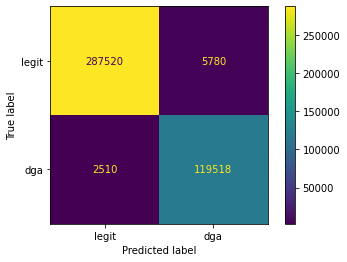

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DTmodel, intermediate_layer_model.predict(X_test), y_test, display_labels=["legit", "dga"])

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

dtpprd = DTmodel.predict_proba(intermediate_layer_model.predict(X_test))[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,dtpprd)
auc = metrics.roc_auc_score(y_test,dtpprd)

In [ ]:
print(auc)

0.9798738766544456


<function matplotlib.pyplot.show>

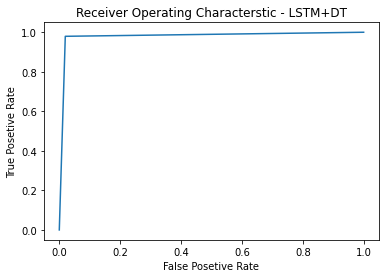

In [ ]:
plt.title('Receiver Operating Characterstic - LSTM+DT')
plt.plot(fpr,tpr,label= "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLSTM+DTmodel.sav'
pickle.dump(DTmodel, open(filename, 'wb'))

## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import time
start = time.time()
ABmodel = AdaBoostClassifier().fit(intermediate_output, y_train)
end = time.time()
print("It took {} milliseconds to train AB with feature from LSTM intermidiate layer.\n".format(end-start))

It took 1118.532565355301 milliseconds to train AB with feature from LSTM intermidiate layer.



In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
ABpred = ABmodel.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print(classification_report(y_test, ABpred))
print("It took {} milliseconds to test AB with feature from LSTM intermidiate layer.\n".format(end-start))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    293300
           1       0.95      0.99      0.97    122028

    accuracy                           0.98    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.98      0.98      0.98    415328

It took 80.12366890907288 milliseconds to test AB with feature from LSTM intermidiate layer.



In [ ]:
print('accuracy on the train set: ', accuracy_score(ABmodel.predict(intermediate_output), y_train))
print('accuracy on the test set: ', accuracy_score(ABpred, y_test))

accuracy on the train set:  0.9857819237020061
accuracy on the test set:  0.9839813352338392


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


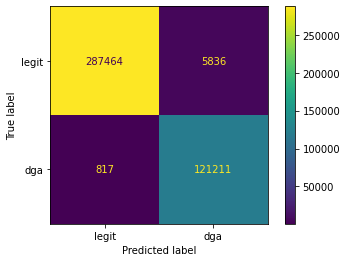

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ABmodel, intermediate_layer_model.predict(X_test), y_test, display_labels=["legit", "dga"])

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

abpprd = ABmodel.predict_proba(intermediate_layer_model.predict(X_test))[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,abpprd)
auc = metrics.roc_auc_score(y_test,abpprd)

In [ ]:
print(auc)

0.9983136618184167


<function matplotlib.pyplot.show>

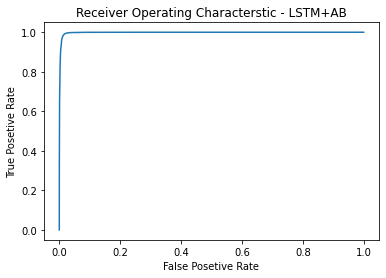

In [ ]:
plt.title('Receiver Operating Characterstic - LSTM+AB')
plt.plot(fpr,tpr,label= "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLSTM+ABmodel.sav'
pickle.dump(ABmodel, open(filename, 'wb'))

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
start = time.time()
XGBmodel = XGBClassifier().fit(intermediate_output, y_train)
end = time.time()
print("It took {} milliseconds to train XGB with feature from LSTM intermidiate layer.\n".format(end-start))

It took 1042.4351859092712 milliseconds to train XGB with feature from LSTM intermidiate layer.



In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
xgbpred = XGBmodel.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print("It took {} milliseconds to test XGB with feature from LSTM intermidiate layer.\n".format(end-start))
print(classification_report(y_test, xgbpred))

It took 83.55082297325134 milliseconds to test XGB with feature from LSTM intermidiate layer.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    293300
           1       0.96      0.99      0.98    122028

    accuracy                           0.99    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.99      0.99      0.99    415328



In [ ]:
print('accuracy on the train set: ', accuracy_score(XGBmodel.predict(intermediate_output), y_train))
print('accuracy on the test set: ', accuracy_score(xgbpred, y_test))

accuracy on the train set:  0.9865082294716083
accuracy on the test set:  0.9852165035827105


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


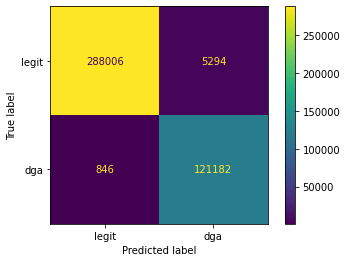

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(XGBmodel, intermediate_layer_model.predict(X_test), y_test, display_labels=["legit", "dga"])

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

xgbpprd = XGBmodel.predict_proba(intermediate_layer_model.predict(X_test))[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,xgbpprd)
auc = metrics.roc_auc_score(y_test,xgbpprd)

In [ ]:
print(auc)

0.9984580275411686


<function matplotlib.pyplot.show>

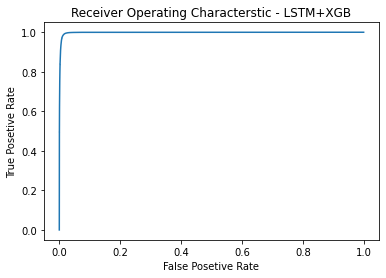

In [ ]:
plt.title('Receiver Operating Characterstic - LSTM+XGB')
plt.plot(fpr,tpr,label= "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLSTM+XGBmodel.sav'
pickle.dump(XGBmodel, open(filename, 'wb'))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
start = time.time()
Lreg = LogisticRegression().fit(intermediate_output, y_train)
end = time.time()
print("It took {} milliseconds to train LR with feature from LSTM intermidiate layer.\n".format(end-start))

It took 34.19720220565796 milliseconds to train LR with feature from LSTM intermidiate layer.



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
Lregy_pred = Lreg.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print("It took {} milliseconds to test LR with feature from LSTM intermidiate layer.\n".format(end-start))
print(classification_report(y_test, Lregy_pred))

It took 74.13133192062378 milliseconds to test LR with feature from LSTM intermidiate layer.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    293300
           1       0.96      0.99      0.98    122028

    accuracy                           0.99    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.99      0.99      0.99    415328



In [ ]:
print('accuracy on the train set: ', accuracy_score(Lreg.predict(intermediate_output), y_train))
print('accuracy on the test set: ', accuracy_score(Lregy_pred, y_test))

accuracy on the train set:  0.986399710844856
accuracy on the test set:  0.9852116881115648


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


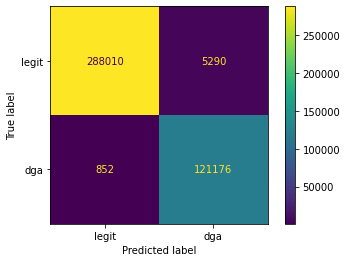

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Lreg, intermediate_layer_model.predict(X_test), y_test, display_labels=["legit", "dga"])

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

lrpprd = Lreg.predict_proba(intermediate_layer_model.predict(X_test))[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,lrpprd)
auc = metrics.roc_auc_score(y_test,lrpprd)

In [ ]:
print(auc)

0.998478933283448


<function matplotlib.pyplot.show>

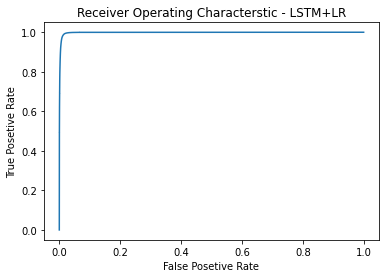

In [ ]:
plt.title('Receiver Operating Characterstic - LSTM+LR')
plt.plot(fpr,tpr,label= "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLSTM+LRmodel.sav'
pickle.dump(Lreg, open(filename, 'wb'))

## Naive Bayes

In [ ]:
import time
from sklearn.naive_bayes import GaussianNB
start = time.time()
gnb = GaussianNB().fit(intermediate_output, y_train)
end = time.time()
print("It took {} milliseconds to train NB with feature from LSTM intermidiate layer.\n".format(end-start))

It took 1.0908937454223633 milliseconds to train NB with feature from LSTM intermidiate layer.



In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
gnb_pred = gnb.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print("It took {} milliseconds to test NB with feature from LSTM intermidiate layer.\n".format(end-start))
print(classification_report(y_test, gnb_pred,labels=['DGA', 'Non-DGA']))

It took 86.34828090667725 milliseconds to test NB with feature from LSTM intermidiate layer.



/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: ignored

In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
gnb_pred = gnb.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print("It took {} milliseconds to test NB with feature from LSTM intermidiate layer.\n".format(end-start))
print(classification_report(y_test, gnb_pred))

It took 74.3577835559845 milliseconds to test NB with feature from LSTM intermidiate layer.

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    293300
           1       0.95      0.98      0.97    122028

    accuracy                           0.98    415328
   macro avg       0.97      0.98      0.98    415328
weighted avg       0.98      0.98      0.98    415328



In [ ]:
print('accuracy on the train set: ', accuracy_score(gnb.predict(intermediate_output), y_train))
print('accuracy on the test set: ', accuracy_score(gnb_pred, y_test))

accuracy on the train set:  0.9790781214485784
accuracy on the test set:  0.9801843362354573


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


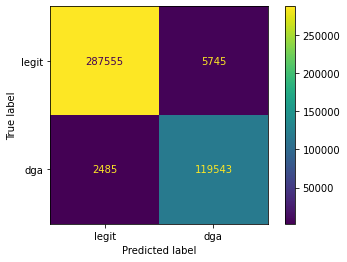

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, intermediate_layer_model.predict(X_test), y_test, display_labels=["legit", "dga"])

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

nbpprd = gnb.predict_proba(intermediate_layer_model.predict(X_test))[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,nbpprd)
auc = metrics.roc_auc_score(y_test,nbpprd)

In [ ]:
print(auc)

0.9930897349231448


<function matplotlib.pyplot.show>

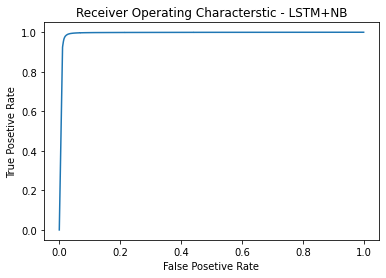

In [ ]:
plt.title('Receiver Operating Characterstic - LSTM+NB')
plt.plot(fpr,tpr,label= "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLSTM+NBmodel.sav'
pickle.dump(gnb, open(filename, 'wb'))

## Random Forest Classifier

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
RFmodel = RandomForestClassifier().fit(intermediate_output, y_train)
end = time.time()
print("It took {} milliseconds to train RF with feature from LSTM intermidiate layer.\n".format(end-start))

It took 3868.60627245903 milliseconds to train RF with feature from LSTM intermidiate layer.



In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
RFpred = RFmodel.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print("It took {} milliseconds to test LR with feature from LSTM intermidiate layer.\n".format(end-start))
print(classification_report(y_test, RFpred))

It took 90.11142206192017 milliseconds to test LR with feature from LSTM intermidiate layer.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    293300
           1       0.96      0.99      0.98    122028

    accuracy                           0.99    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.99      0.99      0.99    415328



In [ ]:
print('accuracy on the train set: ', accuracy_score(RFmodel.predict(intermediate_output), y_train))
print('accuracy on the test set: ', accuracy_score(RFpred, y_test))

accuracy on the train set:  0.9999850466459199
accuracy on the test set:  0.9862927613837738


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


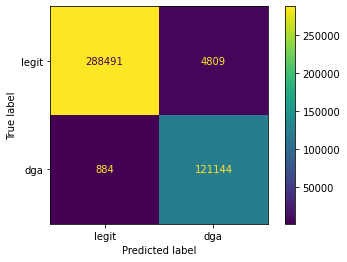

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RFmodel, intermediate_layer_model.predict(X_test), y_test, display_labels=["legit", "dga"])

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

rfpprd = RFmodel.predict_proba(intermediate_layer_model.predict(X_test))[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,rfpprd)
auc = metrics.roc_auc_score(y_test,rfpprd)

In [ ]:
print(auc)

0.9980344476617693


<function matplotlib.pyplot.show>

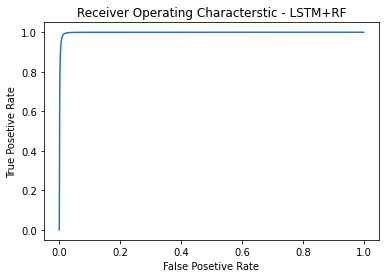

In [ ]:
plt.title('Receiver Operating Characterstic - LSTM+RF')
plt.plot(fpr,tpr,label= "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLSTM+RFmodel.sav'
pickle.dump(RFmodel, open(filename, 'wb'))

## Random Forest Classifier

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
RFmodel = RandomForestClassifier(n_estimators=1000).fit(intermediate_output, y_train)
end = time.time()
print("It took {} milliseconds to train RF with feature from LSTM intermidiate layer.\n".format(end-start))

In [ ]:
from sklearn.metrics import precision_score, accuracy_score,classification_report
start = time.time()
RFpred = RFmodel.predict(intermediate_layer_model.predict(X_test))
end = time.time()
print("It took {} milliseconds to test LR with feature from LSTM intermidiate layer.\n".format(end-start))
print(classification_report(y_test, RFpred))

It took 90.11142206192017 milliseconds to test LR with feature from LSTM intermidiate layer.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    293300
           1       0.96      0.99      0.98    122028

    accuracy                           0.99    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.99      0.99      0.99    415328



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision=precision_score(RFpred,y_test)
recall=recall_score(RFpred,y_test)
f1=f1_score(RFpred,y_test)
accuracy=accuracy_score(RFpred,y_test)
print(accuracy,precision,recall,f1)

In [ ]:
print('accuracy on the train set: ', accuracy_score(RFmodel.predict(intermediate_output), y_train))
print('accuracy on the test set: ', accuracy_score(RFpred, y_test))

accuracy on the train set:  0.9999850466459199
accuracy on the test set:  0.9862927613837738


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


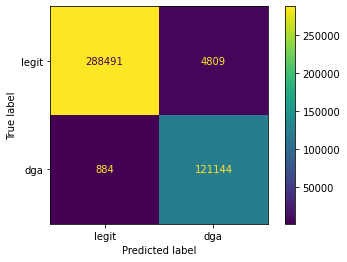

In [ ]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RFmodel, intermediate_layer_model.predict(X_test), y_test, display_labels=["legit", "dga"])

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

rfpprd = RFmodel.predict_proba(intermediate_layer_model.predict(X_test))[::,1]

In [ ]:
fpr,tpr, _ = metrics.roc_curve(y_test,rfpprd)
auc = metrics.roc_auc_score(y_test,rfpprd)

In [ ]:
print(auc)

0.9980344476617693


<function matplotlib.pyplot.show>

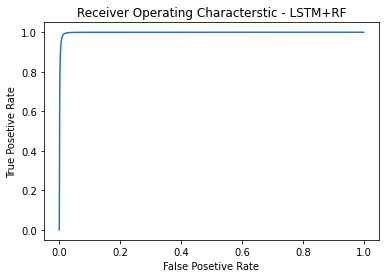

In [ ]:
plt.title('Receiver Operating Characterstic - LSTM+RF')
plt.plot(fpr,tpr,label= "AUC = %0.5f" % (auc))
plt.ylabel('True Posetive Rate')
plt.xlabel('False Posetive Rate')
plt.show

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/BLSTM+RFmodel.sav'
pickle.dump(RFmodel, open(filename, 'wb'))